# **Linear Least Squares**

In this basic example, we will solve a *regression* problem with a simple linear model using gradiend descend.
We have a training set composed of inputs $\mathbf{x} =[x_{1},x_{2},..,x_{i}, ..., x_{N}]^T$ and labels $\mathbf{y} =[y_{1},y_{2},..,y_{i}, ..., y_{N}]^T$, where $x_{i}, y_{i} \in \mathbb{R}$.
The goal is to find a function $f(x): \mathbb{R} \to \mathbb{R}$ that fits well with my dataset.

In this case, we employ a parametrized linear model:

$f(x,a, b) = ax + b$

where the learnable parameters are $\theta = \{a, b\}$.

Let's assume to use MSE as objective:

$J = \frac{1}{N}\sum_{i=1}^N (y_i - \hat{y_i})^2$, where

$\hat{y_i} = a x_i +b$


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def linear_model(x, a=0.5, b=0.0):
  """Linear model parametrized by w0 and w1"""
  return a * x + b

# **1. Dataset creation**

Let's draw some samples for training and test.

In [ ]:
def get_label(x, sigma=0.5, mu=0.0):
  """This function gets the label for the input x.
  It adds a small noise to model imperfect observations.
  """
  noise = sigma * np.random.randn(x.size)+ mu
  # In this case, we use a linear model
  return 2* x + 3 + noise

In [ ]:
def get_dataset(N):
  "This function creates a dataset with N examples."
  x = np.random.uniform(low=0.0, high=2 * math.pi, size=N)
  return x, get_label(x)


In [ ]:
# Let's draw the training and test set
x_train, y_train = get_dataset(100)
x_test, y_test = get_dataset(25)

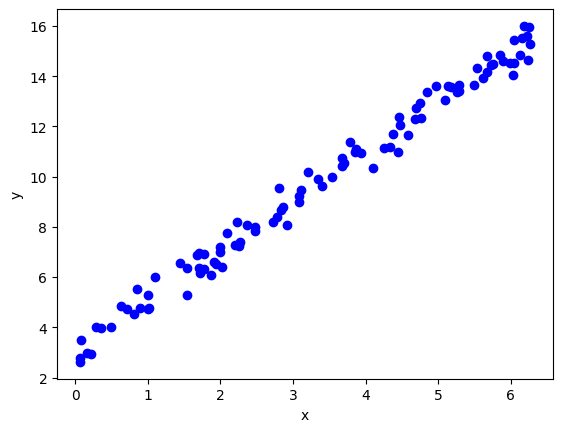

In [ ]:
# We can plot the training samples
plt.plot(x_train, y_train, 'o', color='blue')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

**Remark**:

As you can see, we sample data from a linear function (with a little Gaussian noise added). In a real machine learning problem, however, we have **no access** to the **data generation** process. For example, in an object classification problem, we don't know the complex function that maps the pixels of an image to some output classes.

In this toy example, we assume to know the data generation function because, this way, we can easily **sample** examples from it.
In any case, the machine learning algorithm only sees the training samples drawn from this model and does not have access to the data generation function itself.

Notes: Gaussian is use for random data sth...


# **2. Training**
To perform gradient descend, we have to compute the gradients:

$\frac{\partial J }{\partial a} = \frac{1}{N} \sum_{i=1}^M(y_i -\hat{y}) x_i$

$\frac{\partial J }{\partial b} = \frac{1}{N} \sum_{i=1}^M(y_i -\hat{y})$

Let's start the training with random values:

$a = 1.0$ and $b=0.5$

Side Note: we can use grid search to look for parameter a and b: below

For a regression problem, we can use the Mean Squared Error (MSE) as objective function (the lower the better):

1.9782993901041195
3.098510797571741


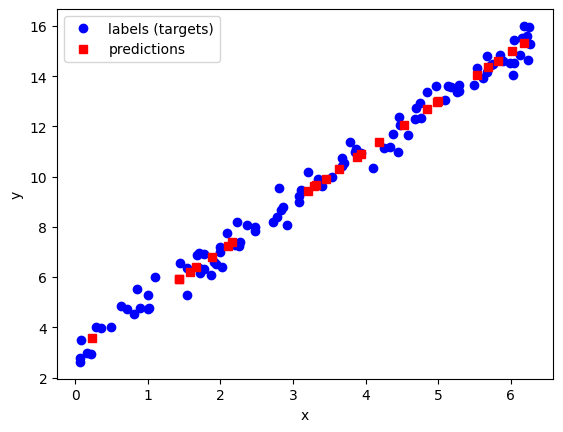

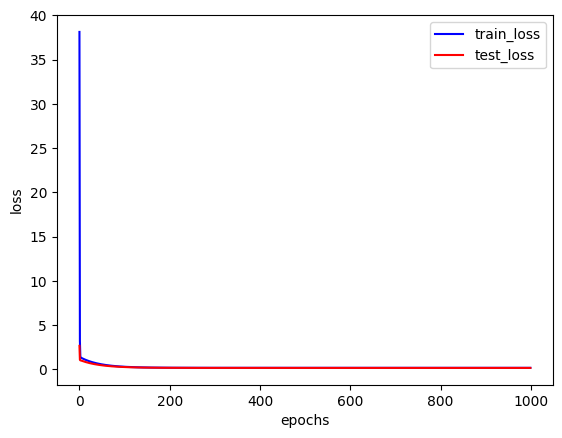

In [ ]:
def mse(y, pred):
  return ((y - pred)**2).mean()

# Initial Values
a = 1.0
b = 0.5

N_epochs = 1000
lr = 0.05

train_loss = []
test_loss = []
for epoch in range(N_epochs):

  # compute the predictions
  y_hat = linear_model(x_train, a, b)

  # compute the gradient
  grad_a = ((y_hat - y_train) * x_train).mean()
  grad_b = (y_hat - y_train).mean()

  # parameter updates
  a = a -lr * grad_a
  b = b -lr * grad_b

  # compute the training loss (just to monitor)
  train_loss.append(mse(y_train, y_hat))
  test_y_hat = linear_model(x_test, a, b)
  test_loss.append(mse(y_test, test_y_hat))


# Let's plot predictions vs labels
print(a)
print(b)
plt.plot(x_train, y_train, 'o', color='blue')
plt.plot(x_test, test_y_hat, 's', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['labels (targets)','predictions'])
plt.show()


plt.plot(train_loss, color='blue')
plt.plot(test_loss, color='red')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train_loss','test_loss'])
plt.show()

Let's now try to do a little step forward and backward for all the parameters, and let's monitor how the performance changes:

# Direct Solution
For this simple problem, the direct (closed form) solution exists.

Basically:

$\mathbf{w}^* = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X^T}\mathbf{y}$

where:
$\mathbf{w} = [b, a]$, $\mathbf{X}=\begin{bmatrix} 1, x_1 \\  1, x_2 \\  ... \\  1, x_N \end{bmatrix}$, $\mathbf{y} = [y_1, y_2, ..., y_N]$


In [ ]:
# Let's arrage the data in the expected way:
x_train_mat = np.expand_dims(x_train, 1)

ones_bias = np.ones((x_train.shape[0],1) )
x_train_mat = np.concatenate((ones_bias, x_train_mat), axis=1)

xtx = np.dot(x_train_mat.transpose(), x_train_mat)
xtx_inverse = np.linalg.inv(xtx)
xtx_inverse_xt = np.dot(xtx_inverse, x_train_mat.transpose())

w_opt = xtx = np.dot(xtx_inverse_xt, y_train)

print(w_opt)



[3.0985305  1.97829487]


As you can see, the performance is simular to that achieved with SGD. In this case, however, we did not apply any iterative traning. Unfortunately, the direct solution does not exist in most real cases.

We can also compute the direct solution using scikit-learn:

In [ ]:
from sklearn.linear_model import LinearRegression
x_train_mat = np.expand_dims(x_train, 1)
reg = LinearRegression().fit(x_train_mat, y_train)
print(reg.coef_)
print(reg.intercept_)

[1.97829487]
3.098530502096299


The performance is hte same as the previous methods.

# **Conclusion**

We have seen some simple ways to perform linear regression. The first was based on gradient descend, the second on a direct solution. Finally, we used scikit learn to solve the problem as well.